За методом найменших квадратів:
slope_hat: 3.0534153648151303
intercept_hat: 5.7121448118573745

За np.polyfit:
slope_np: 3.053415364815129
intercept_np: 5.712144811857382

За методом градієнтного спуску:
slope_hat_grad: 3.3490275952261332
intercept_hat_grad: 3.746117472406529


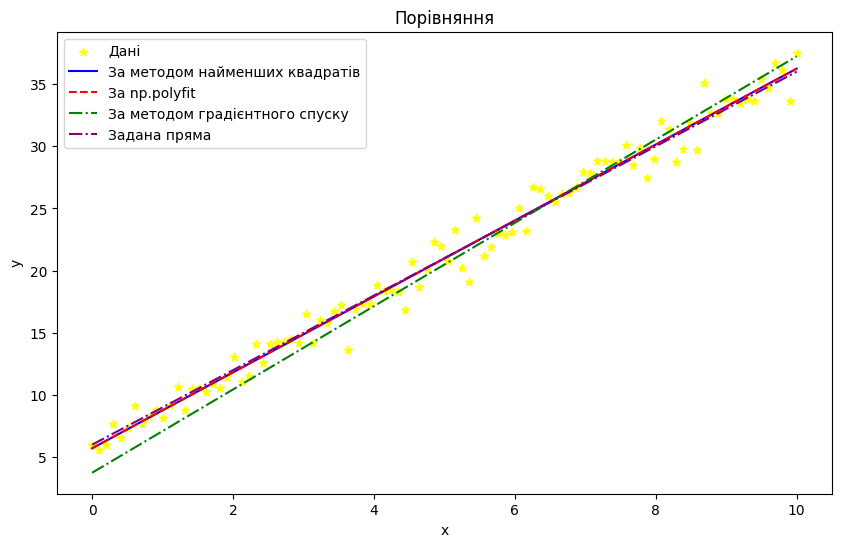

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Задана пряма
slope_true = 3
intercept_true = 6

# Випадкові дані
num_points = 100
x = np.linspace(0, 10, num_points)
noise = np.random.normal(0, 1, num_points)
y = slope_true * x + intercept_true + noise

# Функція для МНК
def least_squares(x, y):
    n = len(x)
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    xy_mean = np.mean(x * y)
    x_squared_mean = np.mean(x**2)

    slope_hat = (xy_mean - x_mean * y_mean) / (x_squared_mean - x_mean**2)
    intercept_hat = y_mean - slope_hat * x_mean

    return slope_hat, intercept_hat

# Метод найменших квадратів
slope_hat, intercept_hat = least_squares(x, y)

print("За методом найменших квадратів:")
print("slope_hat:", slope_hat)
print("intercept_hat:", intercept_hat)

# np.polyfit
coefficients = np.polyfit(x, y, 1)
slope_np, intercept_np = coefficients
print("\nЗа np.polyfit:")
print("slope_np:", slope_np)
print("intercept_np:", intercept_np)

# Метод градієнтного спуску
def gradient_descent(x, y, learning_rate, n_iter, tolerance=1e-2):
    slope_hat = 0
    intercept_hat = 0
    n = len(x)
    errors = []  # Зберігатиме значення похибки після кожної ітерації
    prev_error = float('inf')  # Попереднє значення похибки
    for _ in range(n_iter):
        y_pred = slope_hat * x + intercept_hat
        error = y_pred - y
        mse = np.mean(error ** 2)  # Середнє значення похибки
        errors.append(mse)
        gradient_slope = (2/n) * np.dot(error, x)
        gradient_intercept = (2/n) * np.sum(error)
        slope_hat -= learning_rate * gradient_slope
        intercept_hat -= learning_rate * gradient_intercept
        # Перевірка, чи зменшується значення похибки
        if abs(prev_error - mse) < tolerance:
            break
        prev_error = mse
    return slope_hat, intercept_hat, errors

# Параметри для методу градієнтного спуску
learning_rate = 0.01
n_iter = 1000
tolerance = 1e-2

# Градієнтний спуск
slope_hat_grad, intercept_hat_grad, errors = gradient_descent(x, y, learning_rate, n_iter, tolerance)
print("\nЗа методом градієнтного спуску:")
print("slope_hat_grad:", slope_hat_grad)
print("intercept_hat_grad:", intercept_hat_grad)

# Відображення результатів на графіку
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Дані', marker='*', color='yellow')
plt.plot(x, slope_hat * x + intercept_hat, label='За методом найменших квадратів', color='blue')
plt.plot(x, slope_np * x + intercept_np, label='За np.polyfit', linestyle='--', color='red')
plt.plot(x, slope_hat_grad * x + intercept_hat_grad, label='За методом градієнтного спуску', linestyle='-.', color='green')
plt.plot(x, slope_true * x + intercept_true, label='Задана пряма', linestyle='-.', color='purple')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Порівняння')
plt.legend()
plt.show()




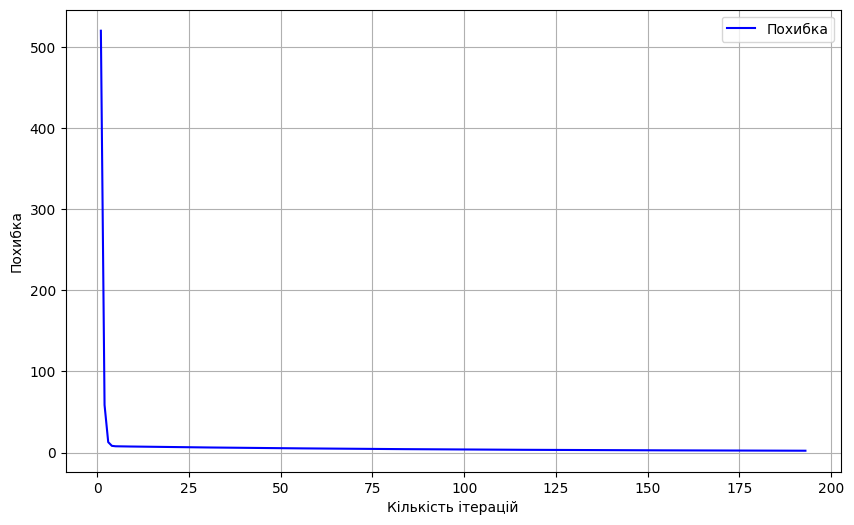

In [2]:
# Побудова графіка похибки від кількості ітерацій
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(errors) + 1), errors, label='Похибка', color='blue')
plt.xlabel('Кількість ітерацій')
plt.ylabel('Похибка')
plt.legend()
plt.grid(True)
plt.show()